<a href="https://colab.research.google.com/github/Swapnil-Giram/Statistical-Analysis/blob/main/yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### importing library and load dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind # T-test for independent samples
from scipy.stats import shapiro # Shapiro-Wilk’s test for Normality
from scipy.stats import levene # Levene's test for Equality of Variance
from scipy.stats import f_oneway # One-way ANOVA
from scipy.stats import chi2_contingency # Chi-square test of independence
from scipy.stats import kstest # KS test for Normality
from scipy.stats import kruskal

In [ ]:
path =  '/content/drive/MyDrive/yulu_exl.xlsx'
df = pd.read_excel(path)

In [ ]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
# checking null values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<ipython-input-49-0be4ed679be9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='spearman'),annot=True)


<Axes: >

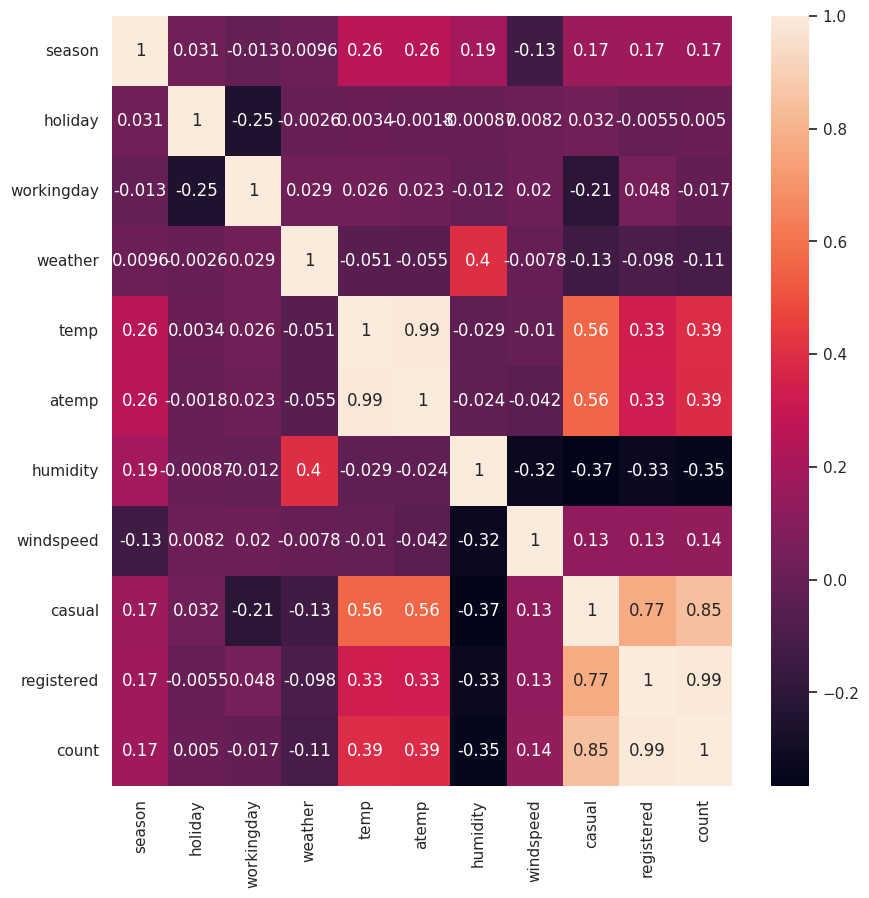

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(method='spearman'),annot=True)

In [ ]:
# droping casual and registered are highly correleted columns
df = df.drop(columns=['casual','registered'])

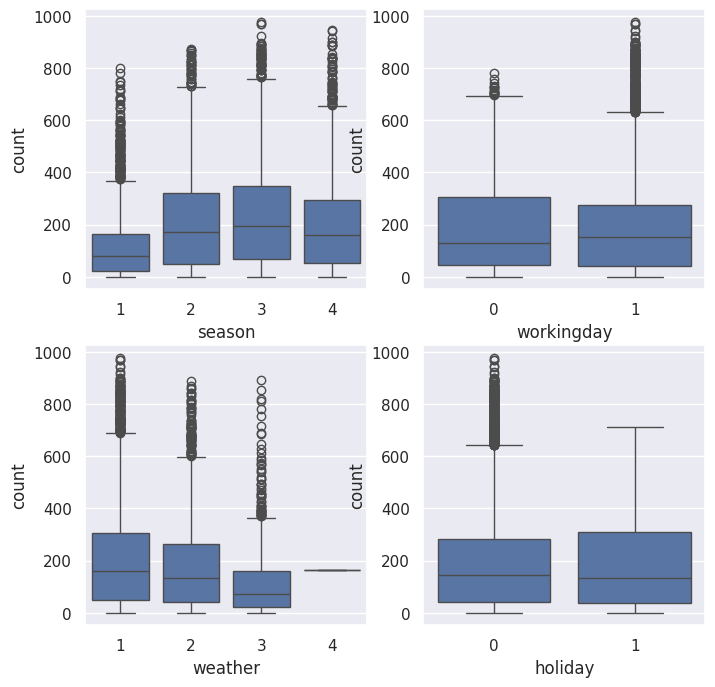

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

sns.boxplot(data=df,x='season',y='count',ax=axes[0,0])
sns.boxplot(data=df,x='workingday',y='count',ax=axes[0,1])
sns.boxplot(data=df,x='weather',y='count',ax=axes[1,0])
sns.boxplot(data=df,x='holiday',y='count',ax=axes[1,1])
plt.show()


In [ ]:
# Removing the outliers
q1 = df["count"].quantile(0.25)
q3 = df["count"].quantile(0.75)
iqr = q3 - q1

df=df[(df["count"]>(q1-(1.5*iqr))) & (df["count"]<(q3+(1.5*iqr)))]
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,tempp
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,cold
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,cold
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,cold
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,cold
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,cold
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336,medium
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241,medium
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168,medium
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129,medium


## **Aggrigation**

In [ ]:
# 1.Workingday
df.groupby("workingday")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3422.0,180.965517,163.782166,1.0,43.0,124.0,295.75,645.0
1,7161.0,173.011591,152.358993,1.0,38.0,143.0,262.00,646.0


In [ ]:
# 1.season
df.groupby("season")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2670.0,112.795131,116.884929,1.0,24.00,78.0,161.00,644.0
2,2633.0,195.653627,166.170802,1.0,45.00,165.0,299.00,646.0
3,2616.0,210.484327,164.055532,1.0,59.75,185.0,323.25,646.0
4,2664.0,184.404655,154.563069,1.0,48.75,154.0,276.25,646.0


In [ ]:
# 1.Workingday
df.groupby("weather")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6962.0,187.131140,161.333785,1.0,45.0,153.0,286.0,646.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [ ]:
# 1.Workingday
df.groupby("holiday")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10274.0,175.372786,155.950275,1.0,40.0,138.0,269.0,646.0
1,309.0,182.588997,163.766590,1.0,38.0,127.0,304.0,597.0


## checking whether the data is normally distributed or not

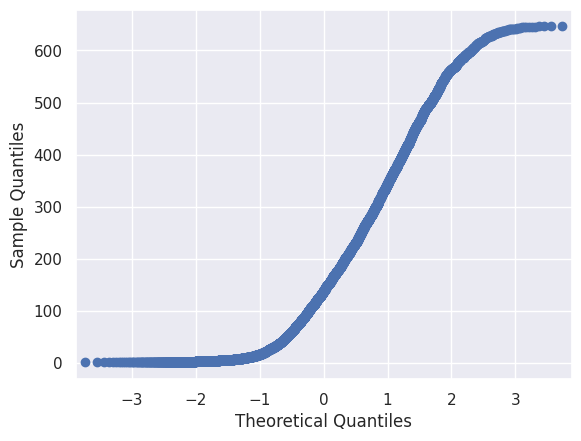

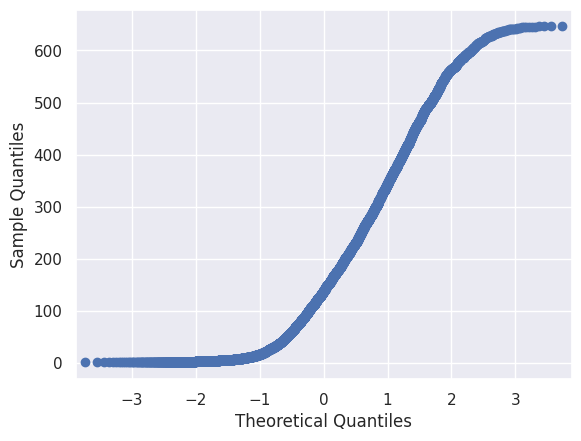

In [ ]:
# checking whether the data is normally distributed or not
import statsmodels.api as sm
figsize = (4,4)
sm.qqplot(df['count'])

## ***Is there a significant difference in the no.of rides between diffrent temperature***


In [ ]:
tem = lambda x : 'cold' if x <= 10 else('medium' if x > 10 and x <= 30 else 'hot')
df['tempp'] = df['temp'].apply(tem)
df.head(3)

<ipython-input-24-e7f2b76a24b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tempp'] = df['temp'].apply(tem)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempp
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,cold
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,cold
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,cold


In [ ]:
# taking samples from datasets
a = df[df['tempp']=='cold']['count'].sample(100)
b = df[df['tempp']=='medium']['count'].sample(100)
c = df[df['tempp']=='hot']['count'].sample(100)

In [ ]:
def result(p_value,alpha):
    if p_value<alpha:
        print(f"As the p_value : {p_value} is less than {alpha} ( level of significance), we Reject the Null Hypothesis")
    else :
        print(f"As the p_value : {p_value} is greater than {alpha} ( level of significance), we Fail to Reject the Null Hypothesis")



In [ ]:
# Ho : Demand for bikes remains same/similar on any temperature
# Ha : Demand for bikes diffrent on diffrent tempeature
# data is not normally distributed thats why we use kruskal meathod insted of annova
alpha = 0.05
p_value = kruskal(a,b,c)
p_value

KruskalResult(statistic=112.14270840130257, pvalue=4.451642477738121e-25)

In [ ]:
result(8.375121154613747e-25,0.05)

As the p_value : 8.375121154613747e-25 is less than 0.05 ( level of significance), we Reject the Null Hypothesis


## Is there a significant difference in the no.of rides between working day and weekend.


In [ ]:
# Ho : Demand for bikes remains same/similar on workin and not working day
# Ha : Demand for bikes  on not working days is more than working day
holiday = df[df['workingday']==0]['count'].sample(300)
workingday = df[df['workingday']==1]['count'].sample(300)

In [ ]:
ttest_ind(holiday,workingday,alternative='greater')

TtestResult(statistic=1.6865090721329328, pvalue=0.046109679864649006, df=598.0)

In [ ]:
result(0.3009206517711258,0.05)

As the p_value : 0.3009206517711258 is greater than 0.05 ( level of significance), we Fail to Reject the Null Hypothesis


In [ ]:
holiday.mean()
workingday.mean()

193.86333333333334

## Is there a significant difference in the no.of rides between season conditions


In [ ]:
# Ho : Demand for bikes rented remains same/similar on diffrent season
# Ha : Demand for bikes rented diffrent on diffrent season
a = df[df['season']==1]['count'].sample(300)
b = df[df['season']==2]['count'].sample(300)
c = df[df['season']==3]['count'].sample(300)
d = df[df['season']==4]['count'].sample(300)
kruskal(a,b,c,d)  # data is not normally distributed thats why we use kruskal meathod insted of annova

KruskalResult(statistic=85.48181516343715, pvalue=2.0451768831183344e-18)

In [ ]:
result(2.0451768831183344e-18,0.05)

As the p_value : 2.0451768831183344e-18 is less than 0.05 ( level of significance), we Reject the Null Hypothesis


## Is there a significant difference in the no.of rides between Holidays and regular.

In [ ]:
# Ho : Demand for bikes remains same/similar on Hoiday ot not a holiday
# Ha : Demand for bikes on holiday greater than Non Holiday
holiday = df.loc[df["holiday"]==1]["count"].sample(299)
non_holiday = df.loc[df["holiday"]==0]["count"].sample(299)

In [ ]:
ttest_ind(holiday,non_holiday,equal_var=False,alternative="greater")

TtestResult(statistic=1.1720612299072204, pvalue=0.12082164628641286, df=592.8021284829997)

In [ ]:
result(0.12082164628641286,0.05)

As the p_value : 0.12082164628641286 is greater than 0.05 ( level of significance), we Fail to Reject the Null Hypothesis


## Is there a significant difference in the no.of rides between Weather conditions



In [ ]:
# Ho : Demand for bikes rented remains same/similar on diffrent weather
# Ha : Demand for bikes rented diffrent on diffrent weather
a = df[df['weather']==1]['count'].sample(700)
b = df[df['weather']==2]['count'].sample(700)
c = df[df['weather']==3]['count'].sample(700)

In [ ]:
kruskal(a,b,c) # data is not normally distributed thats why we use kruskal meathod insted of annova

KruskalResult(statistic=58.654959265406866, pvalue=1.8333164166009332e-13)

In [ ]:
result(3.560412995571813e-08,0.05)

As the p_value : 3.560412995571813e-08 is less than 0.05 ( level of significance), we Reject the Null Hypothesis


## Are the weather conditions significantly differnt in different season?

In [ ]:
from scipy.stats import chi2_contingency
conti = pd.crosstab(df['weather'],df['season'])
conti


season,1,2,3,4
weather,,,,
1,1744,1720,1842,1656
2,714,690,579,787
3,211,223,195,221
4,1,0,0,0


In [ ]:
# Ho : weather conditions significantly same in different season
# Ha : weather conditions significantly differnt in different season
chi2_contingency(conti)

Chi2ContingencyResult(statistic=47.16590591959627, pvalue=3.6550317439064896e-07, dof=9, expected_freq=array([[1.75645280e+03, 1.73211244e+03, 1.72092904e+03, 1.75250572e+03],
       [6.98847208e+02, 6.89162808e+02, 6.84713219e+02, 6.97276765e+02],
       [2.14447699e+02, 2.11475952e+02, 2.10110555e+02, 2.13965794e+02],
       [2.52291411e-01, 2.48795238e-01, 2.47188888e-01, 2.51724464e-01]]))

In [ ]:
result(3.6550317439064896e-07,0.05)

As the p_value : 3.6550317439064896e-07 is less than 0.05 ( level of significance), we Reject the Null Hypothesis


## Insights & Recommendations

#### **EDA based insights -**

1. Total 10,886 rows were present in the data set.
2. Neither missing values

3. 'count', 'casual' and 'registered' columns were highly correlated. </br> Dropping casual & registered columns to avoid multicollinearity.
4. Outlier values were found in the 'count' column.

#### **Insights from hypothesis testing -**
1. The no. of bikes rented on weekdays is comparatively higher than on weekends.
2. The no. of bikes rented on regular days is comparatively higher than on holidays.
2. The demand of bicycles on rent differs under different weather conditions.
3. The demand of bicycles on rent is different during different seasons.
4. The weather conditions are surely dependent upon the ongoing season.
5. In high temperature bikes are rented more as compered to cold and medium
   temperature

#### **Miscellaneous observations -**
The distribution of 'count' column wasn't actually normal or near normal. </br> Infact the column's distribution is found to be a bit skewed towards right.

#### **Generic recommendations -**

* The demand of bikes on rent are usually higher during Weekdays.
* The demand of bikes on rent are usually higher during Regular days.
* The chances of person renting a bike are usually higher during Season 3.
* The chances of person renting a bike are usually higher during Weather condition 1.

We recommend the company to maintain the bike stocks accordingly.
